In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
# Using os package to get data path so that code can run in both unix and windows systems.
RAW_DATA_PATH = os.path.join(os.getcwd(),os.pardir,'data','raw')

In [3]:
# Read sales data
df = pd.read_csv(os.path.join(RAW_DATA_PATH,'sales_training.csv'))

In [4]:
# Read stores data
stores = pd.read_csv(os.path.join(RAW_DATA_PATH,'stores.csv'))

In [5]:
# Look into sales data
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
# Look into stores data
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
# Info about sales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [8]:
# Info about stores
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [9]:
# Join df and stores on Store
df_joined = df.merge(stores,on='Store')

In [10]:
# Look into joined data
df_joined.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [11]:
# Convert column names to lowecase to simplify the use
df_joined.columns=[i.lower() for i in list(df_joined.columns)]

In [12]:
# dataframe after changing case of header
df_joined.head()

,store,dept,date,weekly_sales,isholiday,type,size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [13]:
# Descriptive stats of df_joined
df_joined.describe()

,store,dept,weekly_sales,size
count,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739
std,12.785297,30.492054,22711.183519,60980.583328
min,1.000000,1.000000,-4988.940000,34875.000000
25%,11.000000,18.000000,2079.650000,93638.000000
50%,22.000000,37.000000,7612.030000,140167.000000
75%,33.000000,74.000000,20205.852500,202505.000000
max,45.000000,99.000000,693099.360000,219622.000000


**Insights**
1. Store and department are categorical variables.
2. Min value of weekly sales indecates that there are rows with negatives sales. These can be genuine values as these rows can be refund records.

In [14]:
# convert isholiday column to numerical column by using categorical freature encoding : 0(false) and 1(true)
df_joined['isholiday']=[int(i) for i in df_joined['isholiday']]

In [15]:
df_joined._get_numeric_data().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 5 columns):
store           421570 non-null int64
dept            421570 non-null int64
weekly_sales    421570 non-null float64
isholiday       421570 non-null int64
size            421570 non-null int64
dtypes: float64(1), int64(4)
memory usage: 19.3 MB


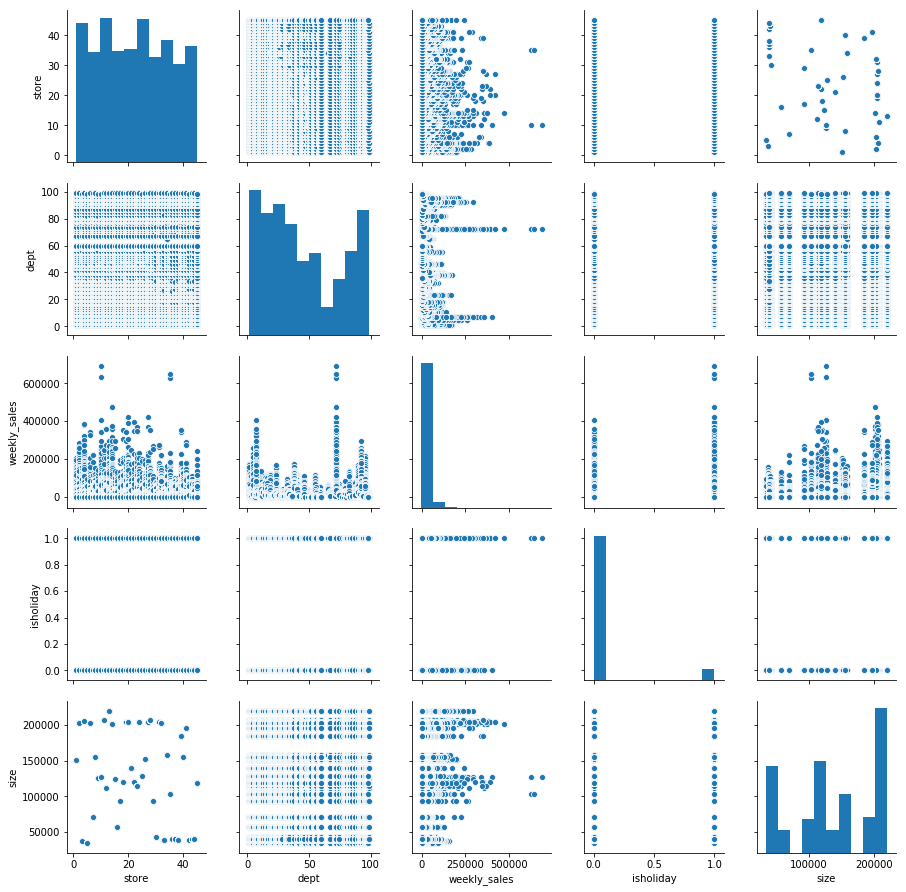

In [16]:
sns.pairplot(df_joined._get_numeric_data())

In [17]:
df_joined._get_numeric_data().corr()

,store,dept,weekly_sales,isholiday,size
store,1.000000,0.024004,-0.085195,-0.000548,-0.182881
dept,0.024004,1.000000,0.148032,0.000916,-0.002966
weekly_sales,-0.085195,0.148032,1.000000,0.012774,0.243828
isholiday,-0.000548,0.000916,0.012774,1.000000,0.000593
size,-0.182881,-0.002966,0.243828,0.000593,1.000000


**Insights:**
The pair plot and correlation matrix suggest that there is no strong correlation between the columns.